# Compute Standard Errors given Bootstrap Replications 

In [18]:
import pandas
import matplotlib.pyplot as plt
import cPickle as pickle
import numpy as np

path = "..\\data\\"

## General Code

In [19]:
def subgroup(ass_repl, ass):    
    a1 = np.array(ass_repl)
    a2 = np.array([1-v if v != -1 else -1 for v in ass_repl])   # 0 and 1 interchanged
    N = float(sum(a1 != -1))
    
    b = np.array([v if a1[i] != -1 else -1 for i, v in enumerate(ass)])   # -1 where ass_repl is -1
    
    error_1 = sum(a1 != b)/N
    error_2 = sum(a2 != b)/N
    
    if error_1 < error_2:
        return a1.tolist(), error_1
    
    return a2.tolist(), error_2

In [20]:
def best_group(ass_repl, ass):
    N = len(ass)
    
    n1 = sum([1 if ass_repl[i] == 1 and ass[i] == 0 else 0 for i in xrange(N)])   # 1 and 0
    n2 = sum([1 if ass_repl[i] == 1 and ass[i] == 1 else 0 for i in xrange(N)])   # 1 and 1 
    n3 = sum([1 if ass_repl[i] == 0 and ass[i] == 1 else 0 for i in xrange(N)])   # 0 and 1
    n4 = sum([1 if ass_repl[i] == 0 and ass[i] == 0 else 0 for i in xrange(N)])   # 0 and 0
    
    C1 = float(sum([1 if ass_repl[i] == 1 else 0 for i in xrange(N)]))
    C0 = float(sum([1 if ass_repl[i] == 0 else 0 for i in xrange(N)]))
    
    return np.max([n1/C1, n2/C1, n3/C0, n4/C0])

In [21]:
def groupings_relation(ass_repl, ass):
    N = len(ass)
    
    r0 = float(sum([1 if ass_repl[i] == 0 else 0 for i in xrange(N)]))   # number of 0s in repl  
    r1 = float(sum([1 if ass_repl[i] == 1 else 0 for i in xrange(N)]))   # number of 1s in repl  
    
    e1 = sum([1 if ass_repl[i] != -1 and ass_repl[i] != ass[i] else 0 for i in xrange(N)])
    e2 = sum([1 if ass_repl[i] != -1 and 1-ass_repl[i] != ass[i] else 0 for i in xrange(N)])
    
    if e1 <= e2:
        r0_o0 = sum([1 if ass_repl[i] == 0 and ass[i] == 0 else 0 for i in xrange(N)])   # repl 0 and original 0
        r1_o1 = sum([1 if ass_repl[i] == 1 and ass[i] == 1 else 0 for i in xrange(N)])   # repl 1 and original 1 
        i = np.argmax([r0_o0/r0, r1_o1/r1])
        
        return e1, ass_repl, [r0_o0/r0, r1_o1/r1][i], [0, 1][i]
             
    r1_o0 = sum([1 if ass_repl[i] == 1 and ass[i] == 0 else 0 for i in xrange(N)])   # repl 1 and original 0
    r0_o1 = sum([1 if ass_repl[i] == 0 and ass[i] == 1 else 0 for i in xrange(N)])   # repl 0 and original 1
    j = np.argmax([r0_o1/r0, r1_o0/r1])

    return e2, [1-ass_repl[i] if ass_repl[i] != -1 else -1 for i in xrange(N)], [r0_o1/r0, r1_o0/r1][j], [1, 0][j]

In [22]:
# test
print groupings_relation([-1, -1, -1, 1, 1, 0, 0, 0, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 0, 0, 1, 1, 1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 1, 0, 1, 0, -1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 1, 1, 1, 0, -1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 0, 0, 0, 1, -1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

(0, [-1, -1, -1, 1, 1, 0, 0, 0, -1, -1], 1.0, 0)
(0, [-1, -1, -1, 1, 1, 0, 0, 0, -1, -1], 1.0, 1)
(2, [-1, -1, -1, 1, 0, 1, 0, -1, -1, -1], 0.5, 0)
(1, [-1, -1, -1, 1, 1, 1, 0, -1, -1, -1], 1.0, 0)
(1, [-1, -1, -1, 1, 1, 1, 0, -1, -1, -1], 1.0, 0)


## Load data (Fehr & Gächter 2010 and deOliveira (2015))

In [23]:
bdata = {}

for case in["fg2010_", "deOliveira_"]:
    for var in ["betaHet", "alpha", "ass", "betaHet_repl", "ass_repl"]:
        bdata[case+var] = pickle.load( open(path+case+var+".pkl", 'rb') )

In [24]:
bdata.keys()

['fg2010_alpha',
 'fg2010_ass_repl',
 'deOliveira_betaHet',
 'deOliveira_betaHet_repl',
 'fg2010_betaHet_repl',
 'fg2010_ass',
 'deOliveira_ass',
 'fg2010_betaHet',
 'deOliveira_ass_repl',
 'deOliveira_alpha']

In [25]:
len(ass), len(ass_repl)

(102, 102)

## FG2010 Bootstrapped Standard Errors

--------------------------------------------------------------------------
                                fg2010_
--------------------------------------------------------------------------
[[0.309555   0.19899602]
 [0.67483023 0.19370317]]
[[0.5253562  0.4157215 ]
 [0.44760618 0.1947044 ]]
[[0.18281183 0.59740372]
 [0.66533187 0.37643996]]
[[0.21007764 0.66791208]
 [1.08582388 1.21513619]]


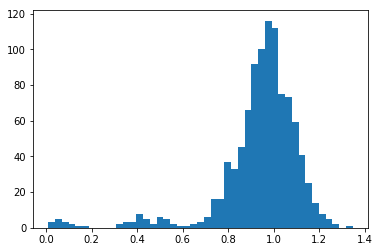

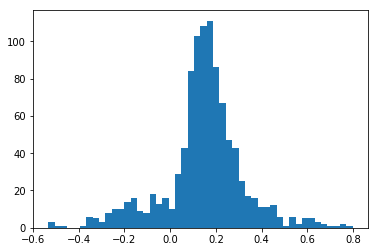

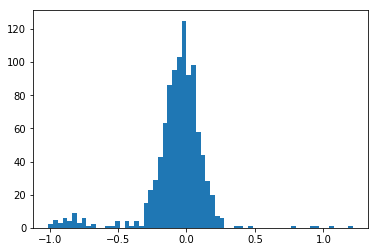

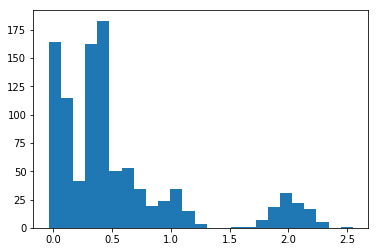

----- Group 1 -----
0.18036305850582138
0.21580946566195036
----- Group 2 -----
0.1769279850379273
0.5755484694324695


In [26]:
adata = {}

for case in["fg2010_"]:
    print "--------------------------------------------------------------------------"
    print "                                " + case
    print "--------------------------------------------------------------------------"
    
    betaHet = bdata[case+"betaHet"]
    ass = bdata[case+"ass"]
    
    belief_G1 = []
    belief_G2 = []
    predcont_G1 = []
    predcont_G2 = []
    
    for i in xrange(len(bdata[case+"ass_repl"])):
        betaHet_repl = bdata[case+"betaHet_repl"][i]
        ass_repl = bdata[case+"ass_repl"][i]
        
        N = float(sum(np.array(ass_repl) != -1))
        error, ass_repl_switched, best_fit, best = groupings_relation(ass_repl, ass)
        
        d = abs((betaHet_repl[0][0]-betaHet_repl[0][1]) - (betaHet_repl[1][0]-betaHet_repl[1][1]))
        
        if d<1 and best_fit<0.9:   # it works well except for TR
            print betaHet_repl
            
        if ass_repl == ass_repl_switched:
            belief_G1.append(betaHet_repl[0][0])
            predcont_G1.append(betaHet_repl[0][1])
            belief_G2.append(betaHet_repl[1][0])
            predcont_G2.append(betaHet_repl[1][1])
        else:
            belief_G1.append(betaHet_repl[1][0])
            predcont_G1.append(betaHet_repl[1][1])
            belief_G2.append(betaHet_repl[0][0])
            predcont_G2.append(betaHet_repl[0][1])
    
    # output
    plt.hist(belief_G1, bins='auto')
    plt.show()
    
    plt.hist(belief_G2, bins='auto')
    plt.show()
    
    plt.hist(predcont_G1, bins='auto')
    plt.show()
    
    plt.hist(predcont_G2, bins='auto')
    plt.show()
    
    # method 1
    print "----- Group 1 -----"
    print np.sqrt(sum(pow(belief_G1-sum(belief_G1)/len(belief_G1),2))/(len(belief_G1)-1))
    print np.sqrt(sum(pow(predcont_G1-sum(predcont_G1)/len(predcont_G1),2))/(len(predcont_G1)-1))

    print "----- Group 2 -----"
    print np.sqrt(sum(pow(belief_G2-sum(belief_G2)/len(belief_G2),2))/(len(belief_G2)-1))
    print np.sqrt(sum(pow(predcont_G2-sum(predcont_G2)/len(predcont_G2),2))/(len(predcont_G2)-1))

## deOliveira et al. (2015) Bootstrapped Standard Errors

--------------------------------------------------------------------------
                                deOliveira_
--------------------------------------------------------------------------


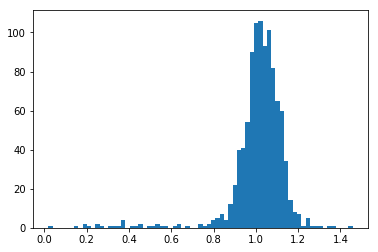

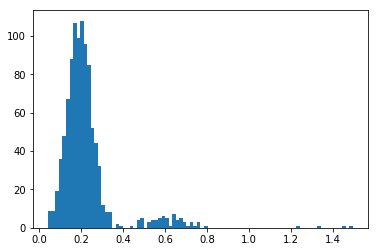

----- Group 1 -----
0.13535719258557108
----- Group 2 -----
0.13989689912454284


In [28]:
adata = {}

for case in["deOliveira_"]:
    print "--------------------------------------------------------------------------"
    print "                                " + case
    print "--------------------------------------------------------------------------"
    
    betaHet = bdata[case+"betaHet"]
    ass = bdata[case+"ass"]
    
    belief_G1 = []
    belief_G2 = []
    
    for i in xrange(len(bdata[case+"ass_repl"])):
        betaHet_repl = bdata[case+"betaHet_repl"][i]
        ass_repl = bdata[case+"ass_repl"][i]
        
        N = float(sum(np.array(ass_repl) != -1))
        error, ass_repl_switched, best_fit, best = groupings_relation(ass_repl, ass)
        
        #d = abs((betaHet_repl[0][0]-betaHet_repl[0][1]) - (betaHet_repl[1][0]-betaHet_repl[1][1]))
        
        #if d<1 and best_fit<0.9:   # it works well except for TR
        #    print betaHet_repl
            
        if ass_repl == ass_repl_switched:
            belief_G1.append(betaHet_repl[0][0])
            belief_G2.append(betaHet_repl[1][0])
        else:
            belief_G1.append(betaHet_repl[1][0])
            belief_G2.append(betaHet_repl[0][0])
    
    # output
    plt.hist(belief_G1, bins='auto')
    plt.show()
    
    plt.hist(belief_G2, bins='auto')
    plt.show()
    
    # method 1
    print "----- Group 1 -----"
    print np.sqrt(sum(pow(belief_G1-sum(belief_G1)/len(belief_G1),2))/(len(belief_G1)-1))

    print "----- Group 2 -----"
    print np.sqrt(sum(pow(belief_G2-sum(belief_G2)/len(belief_G2),2))/(len(belief_G2)-1))